In [ ]:
!pip install flask_ngrok
!pip install flask_restful

     |████████████████████████████████| 51kB 6.2MB/s 


In [ ]:
import math
import numpy as np
from numpy import savetxt
from numpy import asarray
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,load_model
from flask import Flask,request,jsonify,request, send_file, Response, make_response
from flask_ngrok import run_with_ngrok
from io import StringIO, BytesIO
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import json
from flask_restful  import Resource, Api

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model=load_model("/content/gdrive/My Drive/ECG_data/ecg.h5")

In [ ]:
y=0
app = Flask(__name__)
run_with_ngrok(app) 
@app.route('/graph',methods=['GET'])
def grapg():
  plt.close()
  fig = Figure()
  s_n = int(request.args['dat'])
  df3 = pd.read_csv("/content/gdrive/My Drive/ECG_data/mitbih_test.csv", header=None)
  plt.figure(1)
  plt.plot(df3.iloc[s_n,:186])
  canvas = FigureCanvas(plt.figure(1))
  output = BytesIO()
  canvas.print_png(output)
  response = make_response(output.getvalue())
  response.mimetype = 'image/png'
  return response
@app.route('/predict',methods=['GET'])
def predict():
  fig = Figure()
  s_n = int(request.args['dat'])
  if s_n<=21000:
    df3 = pd.read_csv("/content/gdrive/My Drive/ECG_data/mitbih_test.csv", header=None)
    M = df3.values
    Xtest = M[s_n:s_n+1, :-1] 
    plt.plot(df3.iloc[s_n,:186]) 
    ypred = model.predict(np.expand_dims(Xtest,2))
    y_p_r=np.around(ypred).astype(int)
    y=0
    for n in range(0,4):
     if y_p_r[:,n:n+1]==1:
        break
     y=y+1
    if y==0:
      return "0"#"Normal"
    elif y==1:
      return "1"#"Artial Premature"
    elif y==2:
      return "2"#"Premature ventricular conraction"
    elif y==3:
      return "3"#"Fusion of ventricular and normal"
    else:
      return "4"#"Fusion of paced and normal"
  else:
    return "5"

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5877c18afd9d.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [11/Feb/2021 06:24:19] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [11/Feb/2021 06:24:19] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [11/Feb/2021 06:24:38] "GET /graph?dat=1 HTTP/1.1" 200 -
127.0.0.1 - - [11/Feb/2021 06:25:01] "GET /graph?dat=20000 HTTP/1.1" 200 -
127.0.0.1 - - [11/Feb/2021 06:25:54] "GET /predict?dat=20000 HTTP/1.1" 200 -
127.0.0.1 - - [11/Feb/2021 06:26:28] "GET /predict?dat=1 HTTP/1.1" 200 -
127.0.0.1 - - [11/Feb/2021 06:26:41] "GET /graph?dat=2 HTTP/1.1" 200 -


[[[0.90163934]
  [0.90163934]
  [0.67759562]
  [0.41530055]
  [0.22404371]
  [0.14754099]
  [0.1147541 ]
  [0.10928962]
  [0.12021858]
  [0.13114753]
  [0.14754099]
  [0.13114753]
  [0.13114753]
  [0.15300547]
  [0.1693989 ]
  [0.16393442]
  [0.14754099]
  [0.18032786]
  [0.18579236]
  [0.19672132]
  [0.17486338]
  [0.19672132]
  [0.19125684]
  [0.20218579]
  [0.20765027]
  [0.22404371]
  [0.24043716]
  [0.23497267]
  [0.23497267]
  [0.26775956]
  [0.27868852]
  [0.27322406]
  [0.27868852]
  [0.28961748]
  [0.29508197]
  [0.27868852]
  [0.2568306 ]
  [0.24590164]
  [0.24590164]
  [0.20765027]
  [0.1693989 ]
  [0.14207651]
  [0.12568305]
  [0.09289618]
  [0.06557377]
  [0.08743169]
  [0.09289618]
  [0.07650273]
  [0.05464481]
  [0.07103825]
  [0.07650273]
  [0.06010929]
  [0.03825137]
  [0.06010929]
  [0.06010929]
  [0.03278688]
  [0.0273224 ]
  [0.04371585]
  [0.03278688]
  [0.01639344]
  [0.01639344]
  [0.03825137]
  [0.03825137]
  [0.0273224 ]
  [0.01092896]
  [0.0273224 ]
  [0.04371

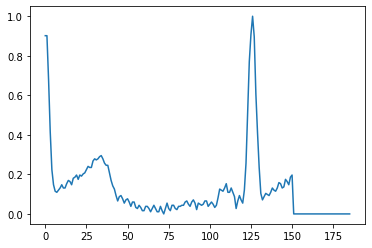

In [ ]:
df3 = pd.read_csv("/content/gdrive/My Drive/ECG_data/mitbih_test.csv", header=None)
s_n = 20
M = df3.values
Xtest = M[s_n:s_n+1, :-1] 
plt.plot(df3.iloc[s_n,:186]) 
print(np.expand_dims(Xtest,2))
ypred = model.predict(np.expand_dims(Xtest,2))